In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
METRICS_DIR='../results/metrics/'

In [3]:
csv_df = []
for csv in os.listdir(METRICS_DIR):
    df = pd.read_csv(METRICS_DIR+csv, index_col=None, header=0)
    csv_df.append(df)

In [4]:
frame = pd.concat(csv_df, axis=0, ignore_index=True)
search_algorithms_frame = frame[frame["maze_algorithm"].isin(["BFS", "DFS", "A*"])]

In [ ]:
plt.style.use('fivethirtyeight')
sns.set_palette("Paired")
plt.figure(figsize=(16, 12))

In [ ]:
print(search_algorithms_frame.dtypes)

In [ ]:
print(search_algorithms_frame.shape)

In [ ]:
search_algorithms_frame.iloc[:5,]

In [ ]:
search_algorithms_frame.groupby(["maze_algorithm", "maze_height"])["path_length"].max()

In [ ]:
search_algorithms_frame.groupby("maze_algorithm")["path_length"].min()

In [ ]:
search_algorithms_frame.groupby(["maze_algorithm", "maze_height"])["nodes_explored"].max()

In [ ]:
search_algorithms_frame.groupby("maze_algorithm")["nodes_explored"].min()

In [ ]:
search_algorithms_frame.groupby(["maze_height", "maze_algorithm"])["nodes_explored"].max()

In [ ]:
sns.barplot(x='maze_height', y='nodes_explored', hue='maze_algorithm', data=search_algorithms_frame)

In [ ]:
sns.barplot(x='maze_height', y='path_length', hue='maze_algorithm', data=search_algorithms_frame)

In [ ]:
sns.barplot(x='maze_height', y='execution_time', hue='maze_algorithm', data=search_algorithms_frame)

In [ ]:
sns.barplot(x='maze_height', y='peak_memory_mb', hue='maze_algorithm', data=search_algorithms_frame)

In [ ]:
sns.barplot(x='nodes_available', y='nodes_explored', hue='maze_algorithm', data=search_algorithms_frame)

In [ ]:
dfs = search_algorithms_frame[search_algorithms_frame["maze_algorithm"] == "DFS"]
bfs = search_algorithms_frame[search_algorithms_frame["maze_algorithm"] == "BFS"]
astar = search_algorithms_frame[search_algorithms_frame["maze_algorithm"] == "A*"]

In [ ]:
sns.lineplot(x="execution_time", y="nodes_explored", hue="maze_algorithm", style="maze_algorithm", markers=True, dashes=False, data=search_algorithms_frame)

In [ ]:
sns.relplot(
    data=search_algorithms_frame, x="maze_height", y="execution_time",
    hue="maze_algorithm", style="maze_algorithm",
    kind="line"
)

In [5]:
search_algorithms_frame

,maze_title,maze_algorithm,maze_height,maze_width,path_length,nodes_available,iterations,policy_changes,states_evaluated,execution_time,is_solution_found,current_memory,peak_memory,current_memory_mb,peak_memory_mb,nodes_explored
1,maze19,BFS,19,19,49,169,NaN,NaN,NaN,0.000921,True,3345,7131,0.003190,0.006801,102.0
2,maze15,A*,15,15,43,101,NaN,NaN,NaN,0.000810,True,3201,9137,0.003053,0.008714,61.0
3,maze45,DFS,45,45,395,1043,NaN,NaN,NaN,0.008043,True,31145,213755,0.029702,0.203853,855.0
4,maze21,DFS,21,21,105,211,NaN,NaN,NaN,0.001732,True,7393,16267,0.007051,0.015513,191.0
6,maze11,BFS,11,11,25,49,NaN,NaN,NaN,0.000403,True,1761,3577,0.001679,0.003411,45.0
7,maze59,BFS,59,59,165,1819,NaN,NaN,NaN,0.016678,True,14977,65811,0.014283,0.062762,1774.0
8,maze101,DFS,101,101,2007,5428,NaN,NaN,NaN,0.044527,True,167137,3397985,0.159394,3.240571,3833.0
9,maze67,DFS,67,67,805,2359,NaN,NaN,NaN,0.019544,True,64065,704521,0.061097,0.671884,2018.0
10,maze7,A*,7,7,13,15,NaN,NaN,NaN,0.000185,True,849,2201,0.000810,0.002099,13.0
11,maze67,A*,67,67,147,2359,NaN,NaN,NaN,0.005700,True,15657,71593,0.014932,0.068276,430.0


In [6]:
search_algorithms_frame.to_csv('../results/search_alg_metrics.csv', index=False)

In [7]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("colorblind")
plt.figure(figsize=(16, 12))

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

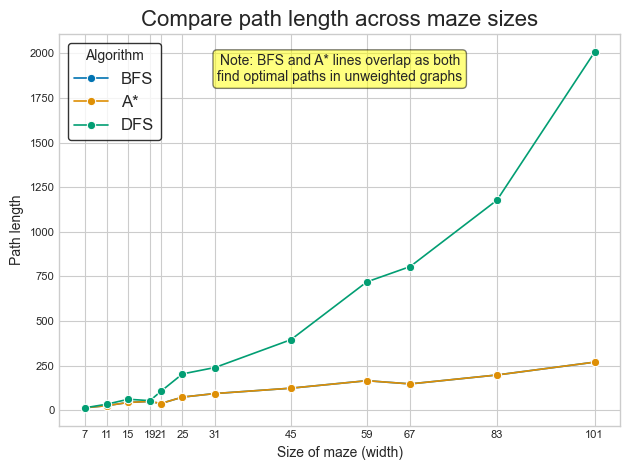

In [8]:
# 1. Create the plot for path length comparison
sns.lineplot(data=search_algorithms_frame, x='maze_width', y='path_length', 
             hue='maze_algorithm', marker='o', markersize=6, linewidth=1.2)

plt.title('Compare path length across maze sizes', fontsize=16)
plt.xlabel('Size of maze (width)', fontsize=10)
plt.ylabel('Path length', fontsize=10)
plt.xticks(search_algorithms_frame['maze_width'].unique(), fontsize=8)
plt.yticks(fontsize=8)


legend = plt.legend(title='Algorithm', fontsize=12, frameon=True)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.0)

plt.annotate('Note: BFS and A* lines overlap as both\nfind optimal paths in unweighted graphs', 
             xy=(0.5, 0.95), xycoords='axes fraction', fontsize=10,
             ha='center', va='top', bbox=dict(boxstyle='round', fc='yellow', alpha=0.5))

plt.tight_layout()
plt.savefig('search_path_quality_comparison.png', dpi=300)
plt.show()

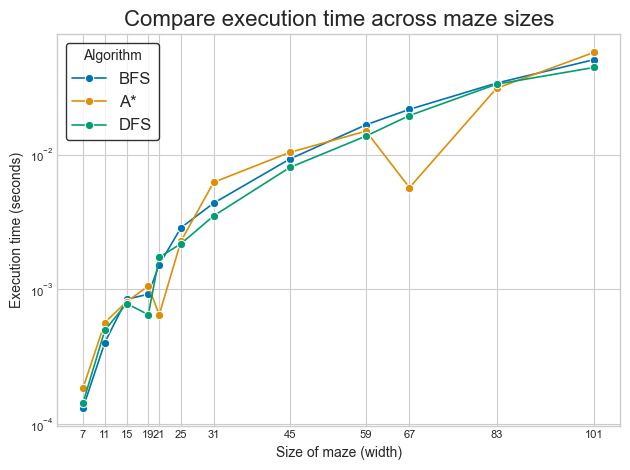

In [9]:
# 2. Plot execution time on a logarithmic scale
sns.lineplot(data=search_algorithms_frame, x='maze_width', y='execution_time', 
             hue='maze_algorithm', marker='o', markersize=6, linewidth=1.2)

plt.title('Compare execution time across maze sizes', fontsize=16)
plt.xlabel('Size of maze (width)', fontsize=10)
plt.ylabel('Execution time (seconds)', fontsize=10)
plt.xticks(search_algorithms_frame['maze_width'].unique(), fontsize=8)
plt.yticks(fontsize=8)

plt.yscale('log')

legend = plt.legend(title='Algorithm', fontsize=12, frameon=True)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.0)
plt.grid(True)

plt.tight_layout()
plt.savefig('search_execution_time_comparison.png', dpi=300)
plt.show()

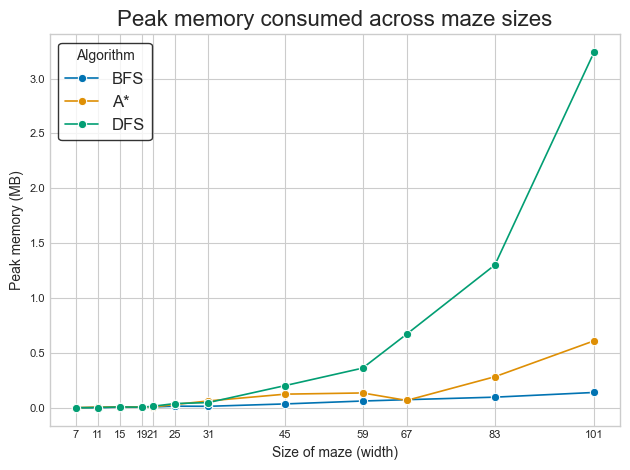

In [10]:
# 3. Create the plot for peak memory usage
sns.lineplot(data=search_algorithms_frame, x='maze_width', y='peak_memory_mb', 
             hue='maze_algorithm', marker='o', markersize=6, linewidth=1.2)

plt.title('Peak memory consumed across maze sizes', fontsize=16)
plt.xlabel('Size of maze (width)', fontsize=10)
plt.ylabel('Peak memory (MB)', fontsize=10)
plt.xticks(search_algorithms_frame['maze_width'].unique(), fontsize=8)
plt.yticks(fontsize=8)

legend = plt.legend(title='Algorithm', fontsize=12, frameon=True)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.0)
plt.grid(True)

plt.tight_layout()
plt.savefig('search_memory_usage_comparison.png', dpi=300)
plt.show()

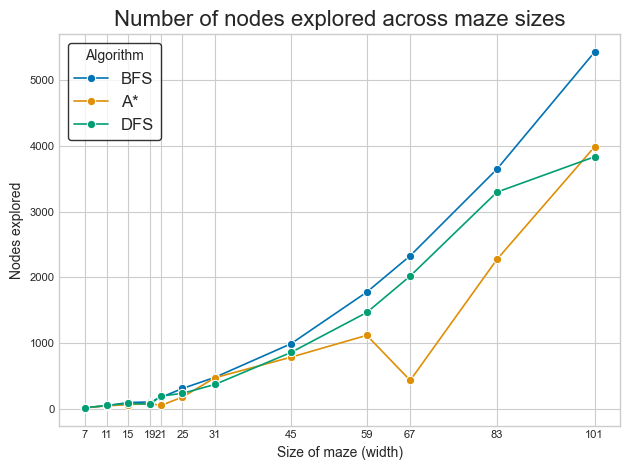

In [11]:
# 4. Create the plot for nodes explored
sns.lineplot(data=search_algorithms_frame, x='maze_width', y='nodes_explored', 
             hue='maze_algorithm', marker='o', markersize=6, linewidth=1.2)

plt.title('Number of nodes explored across maze sizes', fontsize=16)
plt.xlabel('Size of maze (width)', fontsize=10)
plt.ylabel('Nodes explored', fontsize=10)
plt.xticks(search_algorithms_frame['maze_width'].unique(), fontsize=8)
plt.yticks(fontsize=8)

legend = plt.legend(title='Algorithm', fontsize=12, frameon=True)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.0)
plt.grid(True)

plt.tight_layout()
plt.savefig('search_nodes_explored_comparison.png', dpi=300)
plt.show()